# Fit a RL model on individual data

## Import individual data

In [1]:
from rlssm.utility.load_data import load_example_dataset

# import some example data:
data = load_example_dataset(hierarchical_levels=1)

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,feedback_type
0,14,1,1,59,47,4,3,1,1.610360,1,0
1,14,1,2,62,35,4,2,1,1.500792,1,0
2,14,1,3,50,33,4,2,2,1.139539,1,0
3,14,1,4,46,35,2,1,2,1.776485,1,0
4,14,1,5,56,39,3,1,2,1.678911,1,0


## Initialize the model

In [2]:
from rlssm.model.models_RL import RLModel_2A

# you can "turn on and off" different mechanisms:
model = RLModel_2A(hierarchical_levels=1,
                   increasing_sensitivity=False,
                   separate_learning_rates=True)

Using cached StanModel


In [3]:
model.priors

{'sensitivity_priors': {'mu': 1, 'sd': 50},
 'alpha_pos_priors': {'mu': 0, 'sd': 1},
 'alpha_neg_priors': {'mu': 0, 'sd': 1}}

## Fit

In [4]:
# sampling parameters
n_warmup = 500
n_sampling = 2000
n_chains = 2
n_thin = 1

# learning parameters
K = 4  # n options in a learning block (participants see 2 at a time)
initial_value_learning = 27.5  # initial learning value (Q0)

In [5]:
model_fit = model.fit(
    data,
    K,
    initial_value_learning,
    sensitivity_priors={'mu': 0, 'sd': 5},
    thin=n_thin,
    iter_warmup=n_warmup,
    iter_sampling=n_sampling,
    chains=n_chains)

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

## get Rhat

In [6]:
model_fit.rhat

,rhat,variable
name,,
lp__,1.000970,lp__
alpha_pos,0.999736,alpha_pos
alpha_neg,1.000520,alpha_neg
sensitivity,1.000300,sensitivity
log_p_t[1],NaN,log_p_t[1]
...,...,...
log_lik[235],1.001980,log_lik[235]
log_lik[236],1.001290,log_lik[236]
log_lik[237],1.001550,log_lik[237]


## get wAIC

In [7]:
model_fit.waic

{'lppd': -55.07845930061602,
 'p_waic': 3.9306374637991564,
 'waic': 118.01819352883035,
 'waic_se': 15.9638345983968}

## Posteriors

In [8]:
model_fit.samples.describe()

,transf_alpha_pos,transf_sensitivity,transf_alpha_neg
count,4000.000000,4000.000000,4000.000000
mean,0.444514,0.529332,0.068970
std,0.208792,0.093236,0.064849
min,0.063973,0.293867,0.009928
25%,0.281394,0.463385,0.028829
50%,0.406788,0.520701,0.045130
75%,0.564923,0.586167,0.081392
max,0.999535,0.996451,0.541859


In [9]:
import seaborn as sns

sns.set(context="talk",
        style="white",
        palette="husl",
        rc={'figure.figsize': (15, 8)})

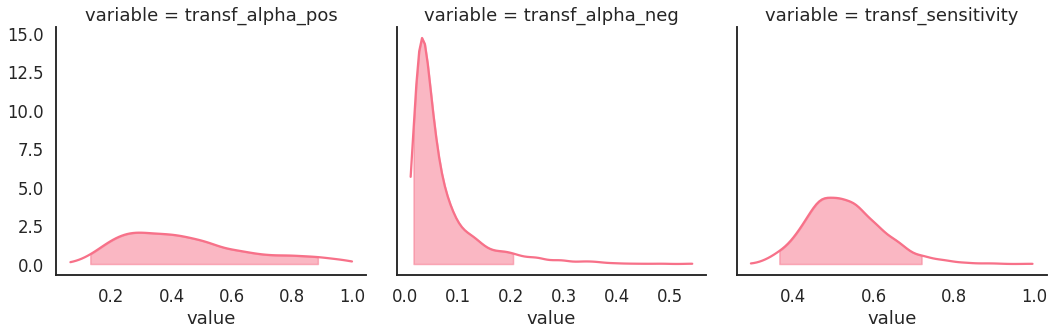

In [10]:
model_fit.plot_posteriors(height=5, show_intervals="HDI", alpha_intervals=.05);

## Posterior predictives

### Ungrouped

In [11]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=1000)
pp

variable accuracy                                      ...                  \
trial         1   2   3   4   5   6   7   8   9   10   ... 230 231 232 233   
sample                                                 ...                   
1               0   1   1   1   1   1   1   1   1   1  ...   1   1   1   1   
2               1   0   1   1   1   1   1   1   1   1  ...   1   1   1   1   
3               1   1   1   1   1   1   1   1   1   1  ...   1   1   1   1   
4               0   1   1   1   0   1   1   0   1   1  ...   1   1   1   1   
5               0   1   1   0   1   1   1   1   1   1  ...   0   1   1   1   
...           ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..   
996             0   1   1   0   0   1   1   1   1   1  ...   1   1   1   1   
997             1   1   1   1   1   1   1   1   1   1  ...   1   1   1   1   
998             1   1   1   1   1   1   1   1   1   1  ...   0   1   1   0   
999             0   1   1   0   0   1   1   0   1   1  ...   1   1   1   1   
1000            1   1   1   1   1   1   0   1   1   1  ...   1   1   1   1   

variable                          
trial    234 235 236 237 238 239  
sample                            
1          1   1   1   1   0   1  
2          1   1   1   1   0   1  
3          1   1   1   1   1   1  
4          0   1   1   1   1   1  
5          1   1   1   1   1   0  
...       ..  ..  ..  ..  ..  ..  
996        1   1   1   1   1   1  
997        1   1   1   1   1   1  
998        1   1   1   1   1   1  
999        1   1   1   1   1   0  
1000       1   1   1   1   1   1  

[1000 rows x 239 columns]

In [12]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=1000)
pp_summary

,mean_accuracy
sample,
1,0.907950
2,0.937238
3,0.920502
4,0.928870
5,0.920502
...,...
996,0.907950
997,0.882845
998,0.887029


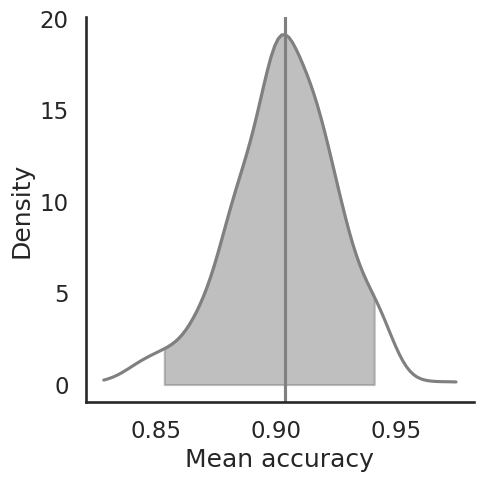

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

model_fit.plot_mean_posterior_predictives(n_posterior_predictives=500, ax=ax, show_intervals='HDI')

ax.set_ylabel('Density')
ax.set_xlabel('Mean accuracy')

sns.despine()

### Grouped

In [14]:
import numpy as np
import pandas as pd

# Define new grouping variables, in this case, for the different choice pairs, but any grouping var can do
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [15]:
model_fit.get_grouped_posterior_predictives_summary(grouping_vars=['block_label', 'block_bins', 'choice_pair'],
                                                    n_posterior_predictives=500)

mean_accuracy
block_label block_bins choice_pair sample               
1           1          AB          1                 1.0
                                   2                 1.0
                                   3                 1.0
                                   4                 1.0
                                   5                 1.0
...                                                  ...
3           8          CD          496               1.0
                                   497               0.0
                                   498               1.0
                                   499               1.0
                                   500               0.0

[46000 rows x 1 columns]

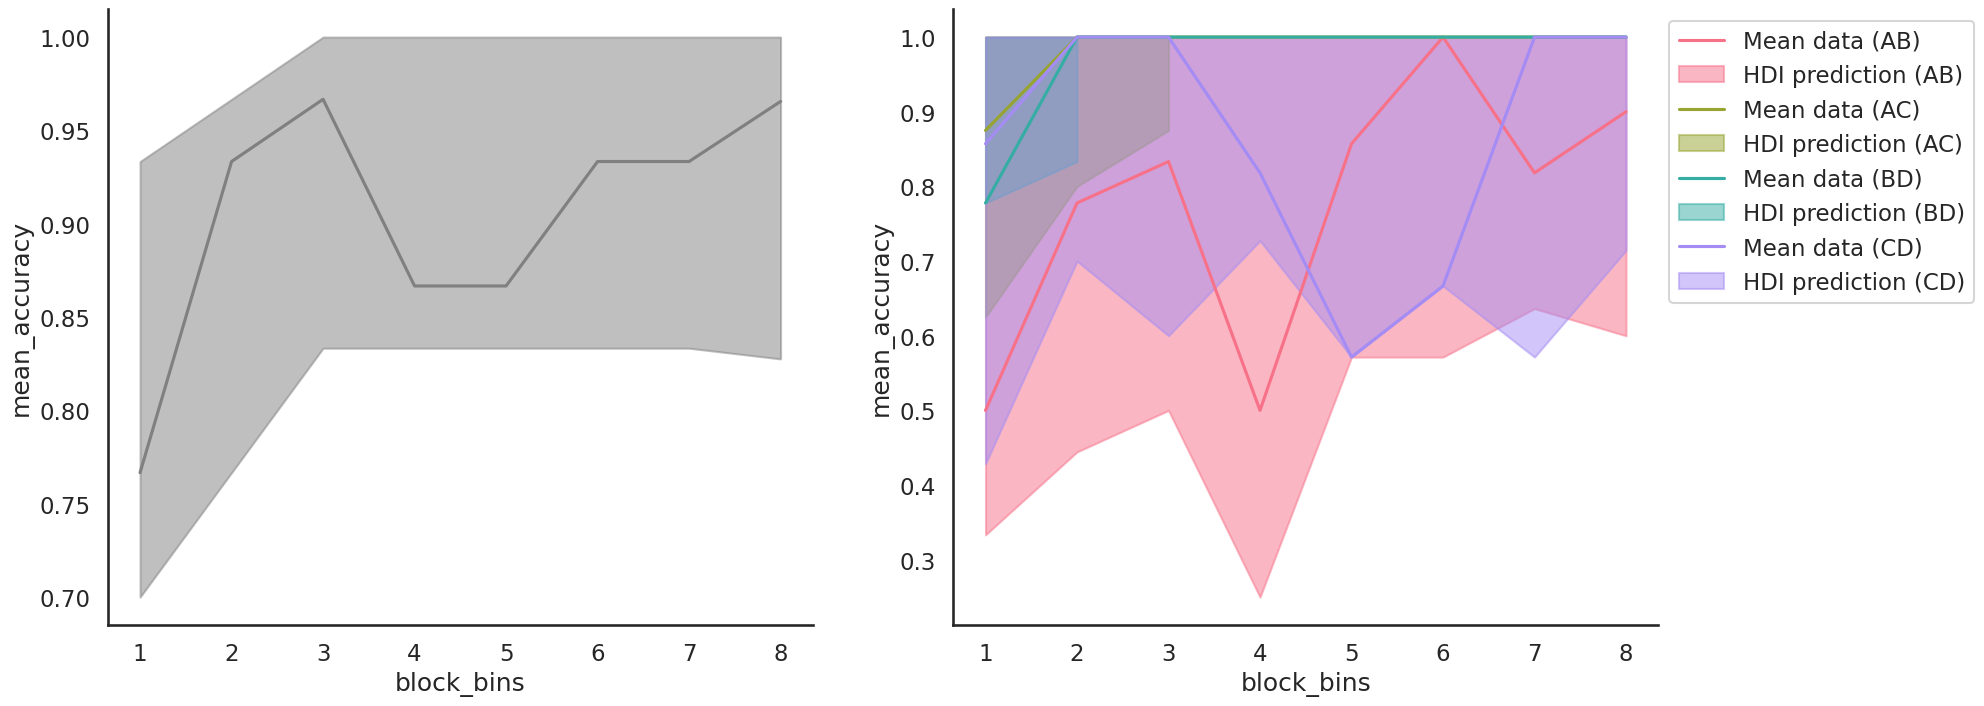

In [16]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], n_posterior_predictives=500, ax=axes[0])

model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins', 'choice_pair'],
                                                  n_posterior_predictives=500, ax=axes[1])

sns.despine()